In [4]:
import glob
import json
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib
import seaborn as sns

sns.set(font_scale=1.2)
sns.set_style("white")
# Smallest context:
sns.set_context("paper")
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# plt.rcParams['axes.linewidth'] = 2.0 #set the value globally

agg_names = {
       'mean': 'Mean',
        'krum': 'Krum',
        'geomed': 'GeoMed',
        'autogm': 'AutoGM',
        'median': 'Median',
        'trimmedmean': 'TrimmedMean',
        'centeredclipping': 'CenteredClipping',
        'clustering': 'Clustering', 
        'clippedclustering': 'ClippedClustering',
}

In [9]:
def read_json(path):
    validation = []
    with open(path, "r") as f:
        count = 0
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '100.0')
            count+=1
            if count % 2 == 0: #this is the remainder operator
#                 continue
                pass
#             ine = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'test':
                validation.append({
                    "Round": data["Round"], 
                    "Accuracy (%)": data['top1'],
                    r"$\beta$": float(re.findall(".*momentum(.*)_bz.*",path)[0]),
                    "Agg": agg_names[path.split("_")[7]],
                    "Batch Size": int(path.split("_")[-3][2:]),
                    "Loss": data["Loss"],
                })
    return validation


def read_json(path, agg=None):
    validation = []
    with open(path, "r") as f:
        count = 0
        for line in f:
            line=line.strip().replace("'", '"')
            line = line.replace("nan", '100.0')
            count+=1
            if count % 2 == 0: #this is the remainder operator
#                 continue
                pass
#             ine = line.replace("nan", '"nan"')
            try:
                data = json.loads(line)
            except:
                print(line)
                raise
            if data['_meta']['type'] == 'test':
                validation.append({
                    "Round": data["Round"], 
                    "Accuracy (%)": data['top1'],
                    r"$\beta$": float(re.findall(".*momentum(.*)_bz.*",path)[0]),
                    "Agg": agg_names[agg] if agg else agg_names[path.split("_")[7]],
#                     "M": int(float(re.findall(".*b(.*)_attack.*",path)[0])),
#                     "Batch Size": int(path.split("_")[-3][2:]),
                    "Batch Size": int(float(re.findall(".*bz(.*)_local.*",path)[0])),
                    "Loss": data["Loss"],
                    "IID": "Yes" if "noniid" not in path else "No"
                })
    return validation

def transform(entry, atk, agg, m, s, d, b, bz):
    if "large" in atk:
        atk_name = r"IPM ($\epsilon = 100$)"
    elif atk == "IPM":
        atk_name = r"IPM ($\epsilon = 0.5$)"
    else:
        atk_name = atk
        
    if b == 0:
        atk_name = "No Attack"
        
    return {
        'Round Number': entry['E'],
        'Accuracy (%)': entry['top1'],
        'ATK': atk_name,
        "Batch Size": bz,
        'Setting': d.replace('f', 'F', 1),
        'AGG': fedavg_methods[agg]['name'],
        r"$\beta$": m,
        'seed': s,
        r"$M$" : b,
        r"$\delta=0$": False,
    }


In [4]:
root_dir = "/home/shenghui/blades/scripts/outputs/cifar10_fedsgd"
aggs = ['mean', 'krum', 'median', 'trimmedmean',  'centeredclipping', 'clustering', 'clippedclustering']
aggs = ['clustering', 'clippedclustering', 'mean', 'krum',  'geomed', 'autogm', 'median', 'trimmedmean',  'centeredclipping']
# aggs = ['clippedclustering', 'mean', 'krum',  'geomed', 'autogm', 'median', 'trimmedmean',  'centeredclipping']atks = ["ipm", "signflipping", "labelflipping", "alie", "noise"] #* 2
atk_names = ["IPM", "SF", "LF", "ALIE", "Noise"] #* 2

history = []
for idx, agg in enumerate(aggs[:]):
    row = []
    print(agg)
    file_paths = glob.glob(f"{root_dir}/b5_*alie*_{agg}_*/stats")
    for file_path in file_paths:
        agg_validation = read_json(file_path)
        history.extend(agg_validation)

clustering
clippedclustering
mean
krum
geomed
autogm
median
trimmedmean
centeredclipping


In [5]:
data = pd.DataFrame(history)

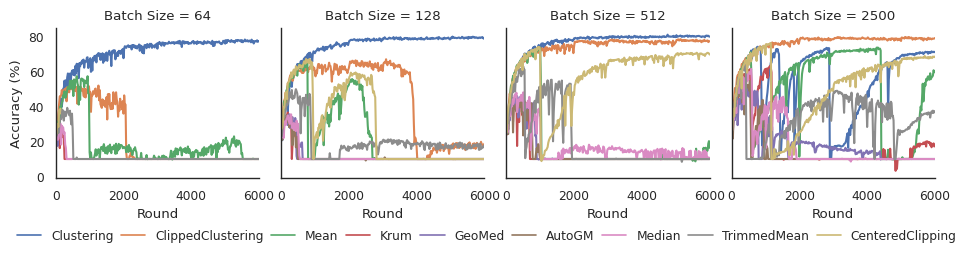

In [32]:
g = sns.relplot(
    data=data,
    x="Round", 
#     y="Loss", 
    y="Accuracy (%)",
    col=r"Batch Size", hue="Agg", style=r"Agg",
#     hue=r"$\beta$", col="Agg", style=r"$\beta$",
    height=2.4, aspect=1.,
    # col_order=col_order,
    # markers=['o', 'x', 'o', 'x', 'o'],
    dashes=False,
#     markers=True,
    col_wrap=4,
    linewidth=1.5,
    kind="line",
)
# g.set(ylim=(0.6, 5))
g.set(xlim=(0, 6000))
sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.075), 
                ncol=9, title=None, frameon=False, columnspacing=0.6)
g.savefig("batch_size.pdf", bbox_inches = "tight") 

In [14]:
root_dir = "/home/shenghui/blades/scripts/outputs/cifar10_fedsgd"
aggs = ['mean', 'krum', 'median', 'trimmedmean',  'centeredclipping', 'clustering', 'clippedclustering']
aggs = ['clustering', 'clippedclustering', 'mean', 'krum',  'geomed', 'autogm', 'median', 'trimmedmean',  'centeredclipping']
# aggs = ['clippedclustering', 'mean', 'krum',  'geomed', 'autogm', 'median', 'trimmedmean',  'centeredclipping']atks = ["ipm", "signflipping", "labelflipping", "alie", "noise"] #* 2
atk_names = ["IPM", "SF", "LF", "ALIE", "Noise"] #* 2

history = []
for idx, agg in enumerate(aggs[:]):
    row = []
    
    file_paths = glob.glob(f"{root_dir}/b3_*noise*_{agg}_*/stats")
#     print(file_paths)
    for file_path in file_paths:
        agg_validation = read_json(file_path, agg)
        history.extend(agg_validation)
data = pd.DataFrame(history)

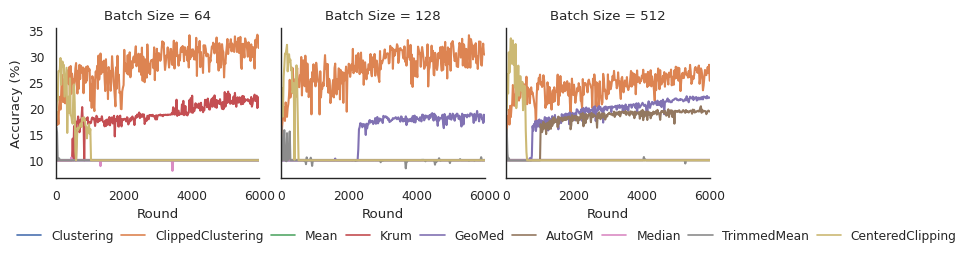

In [15]:
g = sns.relplot(
    data=data,
    x="Round", 
#     y="Loss", 
    y="Accuracy (%)",
    col=r"Batch Size", hue="Agg", style=r"Agg",
#     hue=r"$\beta$", col="Agg", style=r"$\beta$",
    height=2.4, aspect=1.,
    # col_order=col_order,
    # markers=['o', 'x', 'o', 'x', 'o'],
    dashes=False,
#     markers=True,
    col_wrap=4,
    linewidth=1.5,
    kind="line",
)
# g.set(ylim=(0.6, 5))
g.set(xlim=(0, 6000))
sns.move_legend(g, "lower center", bbox_to_anchor=(.45, -0.075), 
                ncol=9, title=None, frameon=False, columnspacing=0.6)
g.savefig("batch_size.pdf", bbox_inches = "tight") 